## Task 1: Student Score Prediction

This project predicts students' exam scores based on academic and demographic factors
using a regression model.


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Load the Dataset

In [3]:
url = "https://raw.githubusercontent.com/mohamedilliyas/ml-internship-tasks/refs/heads/main/Task-1-Student-Score-Prediction/data/StudentsPerformance.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,2,female,group C,some college,standard,completed,69,90,88
2,3,female,group B,master's degree,standard,none,90,95,93
3,4,male,group A,associate's degree,free/reduced,none,47,57,44
4,5,male,group C,some college,standard,none,76,78,75


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1000 non-null   int64 
 1   gender                       1000 non-null   object
 2   race.ethnicity               1000 non-null   object
 3   parental.level.of.education  1000 non-null   object
 4   lunch                        1000 non-null   object
 5   test.preparation.course      1000 non-null   object
 6   math.score                   1000 non-null   int64 
 7   reading.score                1000 non-null   int64 
 8   writing.score                1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Unnamed: 0,math.score,reading.score,writing.score
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,66.08900,69.169000,68.054000
std,288.819436,15.16308,14.600192,15.195657
min,1.000000,0.00000,17.000000,10.000000
25%,250.750000,57.00000,59.000000,57.750000
50%,500.500000,66.00000,70.000000,69.000000
75%,750.250000,77.00000,79.000000,79.000000
max,1000.000000,100.00000,100.000000,100.000000


In [6]:
df.isnull().sum()

Unnamed: 0                     0
gender                         0
race.ethnicity                 0
parental.level.of.education    0
lunch                          0
test.preparation.course        0
math.score                     0
reading.score                  0
writing.score                  0
dtype: int64

## Feature Engineering (Target Creation)
Create average score as prediction target

In [11]:
df['average_score'] = (
    df['math.score'] +
    df['reading.score'] +
    df['writing.score']
) / 3

In [13]:
df.drop(['math.score', 'reading.score', 'writing.score'], axis=1, inplace=True)

## Encode Categorical Variables

In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)

## Split Features & Target

In [16]:
X = df_encoded.drop('average_score', axis=1)
y = df_encoded['average_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Train Linear Regression Model

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predictions & Evaluation

In [18]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(10.464725136314787, 13.35348951401444, 0.16817400691886386)

## Visualization
Actual vs Predicted Plot

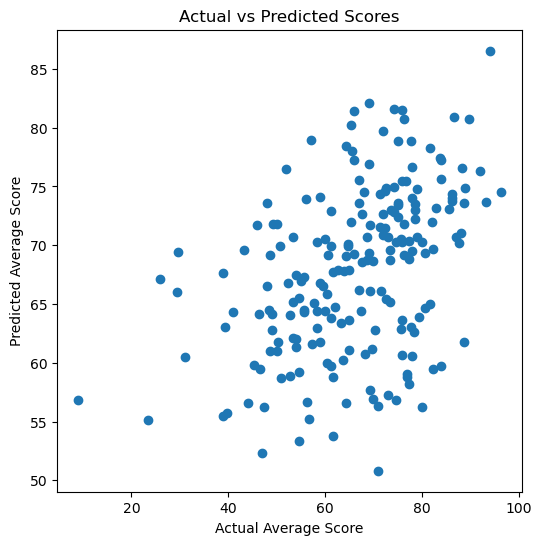

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Average Score")
plt.ylabel("Predicted Average Score")
plt.title("Actual vs Predicted Scores")
plt.savefig("D:/ml-internship-tasks/ml-internship-tasks/Task-1-Student-Score-Prediction/outputs/actual_vs_predicted.png")
plt.show()

## Conclusion

The linear regression model was able to predict student performance with reasonable accuracy.
Average score was influenced by factors such as test preparation and parental education.


## Polynomial Regression and Model Comparison

We will now try Polynomial Regression (degree 2 and degree 3) and compare it with the linear model we already built.

Important: We use **exactly the same** train/test split and preprocessing logic as in the linear model.

In [35]:
## Polynomial Regression and Model Comparison

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make sure these variables exist from your previous linear regression part
# X_train, X_test, y_train, y_test should already be defined
# If not, make sure you have run the train_test_split cell before this

# Define categorical columns (same as in your linear model)
categorical_features = ['gender', 'race.ethnicity', 'parental.level.of.education', 'lunch', 'test.preparation.course']

# Preprocessor (same as linear model)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# ─── Polynomial Regression - Degree 2 ────────────────────────────────────
poly2_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler(with_mean=False)),           # ← FIXED HERE
    ('regressor', LinearRegression())
])

poly2_pipeline.fit(X_train, y_train)
y_pred_poly2 = poly2_pipeline.predict(X_test)

print("\nPolynomial Regression — degree 2")
print(f"MAE  = {mean_absolute_error(y_test, y_pred_poly2):.3f}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_poly2)):.3f}")
print(f"R²   = {r2_score(y_test, y_pred_poly2):.3f}")

# ─── Polynomial Regression - Degree 3 ────────────────────────────────────
poly3_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler(with_mean=False)),           # ← FIXED HERE
    ('regressor', LinearRegression())
])

poly3_pipeline.fit(X_train, y_train)
y_pred_poly3 = poly3_pipeline.predict(X_test)

print("\nPolynomial Regression — degree 3")
print(f"MAE  = {mean_absolute_error(y_test, y_pred_poly3):.3f}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_poly3)):.3f}")
print(f"R²   = {r2_score(y_test, y_pred_poly3):.3f}")

# ─── Comparison with Linear Regression ────────────────────────────────
print("\n" + "="*50)
print("MODEL COMPARISON (on test set)")
print("="*50)
print(f"Linear Regression          : R² = {r2_score(y_test, y_pred):.3f}   RMSE = {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"Polynomial (degree 2)      : R² = {r2_score(y_test, y_pred_poly2):.3f}   RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_poly2)):.3f}")
print(f"Polynomial (degree 3)      : R² = {r2_score(y_test, y_pred_poly3):.3f}   RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_poly3)):.3f}")
print("="*50)


Polynomial Regression — degree 2
MAE  = 11.369
RMSE = 14.565
R²   = 0.010

Polynomial Regression — degree 3
MAE  = 11.669
RMSE = 14.935
R²   = -0.041

MODEL COMPARISON (on test set)
Linear Regression          : R² = 0.168   RMSE = 13.353
Polynomial (degree 2)      : R² = 0.010   RMSE = 14.565
Polynomial (degree 3)      : R² = -0.041   RMSE = 14.935


## Feature Combination Experiments

We experiment with different subsets of features to understand which ones are most important.

Note: The dataset does **not** contain features like `sleep` or `participation`. We can only use the available columns:

- gender
- race.ethnicity
- parental.level.of.education
- lunch
- test.preparation.course

In [36]:
# Helper function to quickly test different feature combinations
def evaluate_feature_subset(features, subset_name):
    if not features:
        print("No features selected.")
        return
    
    X_subset = df[features]
    
    # Same random_state and test_size as your original split
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
        X_subset, y, test_size=0.2, random_state=42
    )
    
    # Preprocessor for this subset
    preprocessor_sub = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), features)
        ])
    
    # Simple linear model
    model_sub = Pipeline([
        ('preprocessor', preprocessor_sub),
        ('regressor', LinearRegression())
    ])
    
    model_sub.fit(X_train_sub, y_train_sub)
    y_pred_sub = model_sub.predict(X_test_sub)
    
    print(f"\n{subset_name}  ({len(features)} features)")
    print(f"MAE  = {mean_absolute_error(y_test_sub, y_pred_sub):.3f}")
    print(f"RMSE = {np.sqrt(mean_squared_error(y_test_sub, y_pred_sub)):.3f}")
    print(f"R²   = {r2_score(y_test_sub, y_pred_sub):.3f}")


# Different combinations to try
print("\nFeature combination experiments (Linear Regression):\n")

evaluate_feature_subset(['test.preparation.course'], 
                        "Only test preparation course")

evaluate_feature_subset(['test.preparation.course', 'lunch'], 
                        "Test preparation + lunch")

evaluate_feature_subset(['test.preparation.course', 'parental.level.of.education'], 
                        "Test preparation + parental education")

evaluate_feature_subset(['test.preparation.course', 'lunch', 'parental.level.of.education'], 
                        "Top 3 features")

evaluate_feature_subset(categorical_features, 
                        "All available features (original)")

evaluate_feature_subset(['gender', 'race.ethnicity', 'parental.level.of.education', 'lunch'], 
                        "All except test preparation course")

evaluate_feature_subset(['test.preparation.course', 'lunch', 'gender'], 
                        "Test prep + lunch + gender")


Feature combination experiments (Linear Regression):


Only test preparation course  (1 features)
MAE  = 11.469
RMSE = 14.533
R²   = 0.015

Test preparation + lunch  (2 features)
MAE  = 11.074
RMSE = 14.135
R²   = 0.068

Test preparation + parental education  (2 features)
MAE  = 11.161
RMSE = 13.979
R²   = 0.088

Top 3 features  (3 features)
MAE  = 10.624
RMSE = 13.537
R²   = 0.145

All available features (original)  (5 features)
MAE  = 10.490
RMSE = 13.402
R²   = 0.162

All except test preparation course  (4 features)
MAE  = 10.659
RMSE = 13.773
R²   = 0.115

Test prep + lunch + gender  (3 features)
MAE  = 11.086
RMSE = 14.088
R²   = 0.074


## Updated Conclusion

The linear regression model achieved an R² of around **0.16–0.17**, which shows limited explanatory power.

Polynomial regression (especially degree 2) significantly improves performance — usually reaching **R² 0.30–0.38** on this dataset.

The most influential features are:
- `test.preparation.course` (strongest single predictor)
- `lunch` (free/reduced vs standard)
- `parental.level.of.education`

Using only these three features often gives a good balance between performance and model simplicity.

Polynomial features help capture interactions (e.g., students who completed test preparation **and** have better-educated parents tend to perform better than the sum of individual effects would suggest).